In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from IPython.display import display, Math
from scipy import stats
import numpy as np
import statsmodels.api as sm
import math
from statsmodels.api import OLS

In [18]:
train = pd.read_csv("./data/house_prediction/train.csv")

In [19]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
# Consider the feature living area and the response vector sale price
train.loc[:, ['GrLivArea', 'SalePrice']]

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


In [21]:
x = train.loc[:,['GrLivArea']]
y = train['SalePrice']

In [23]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

Text(0, 0.5, 'Sale price in ($)')

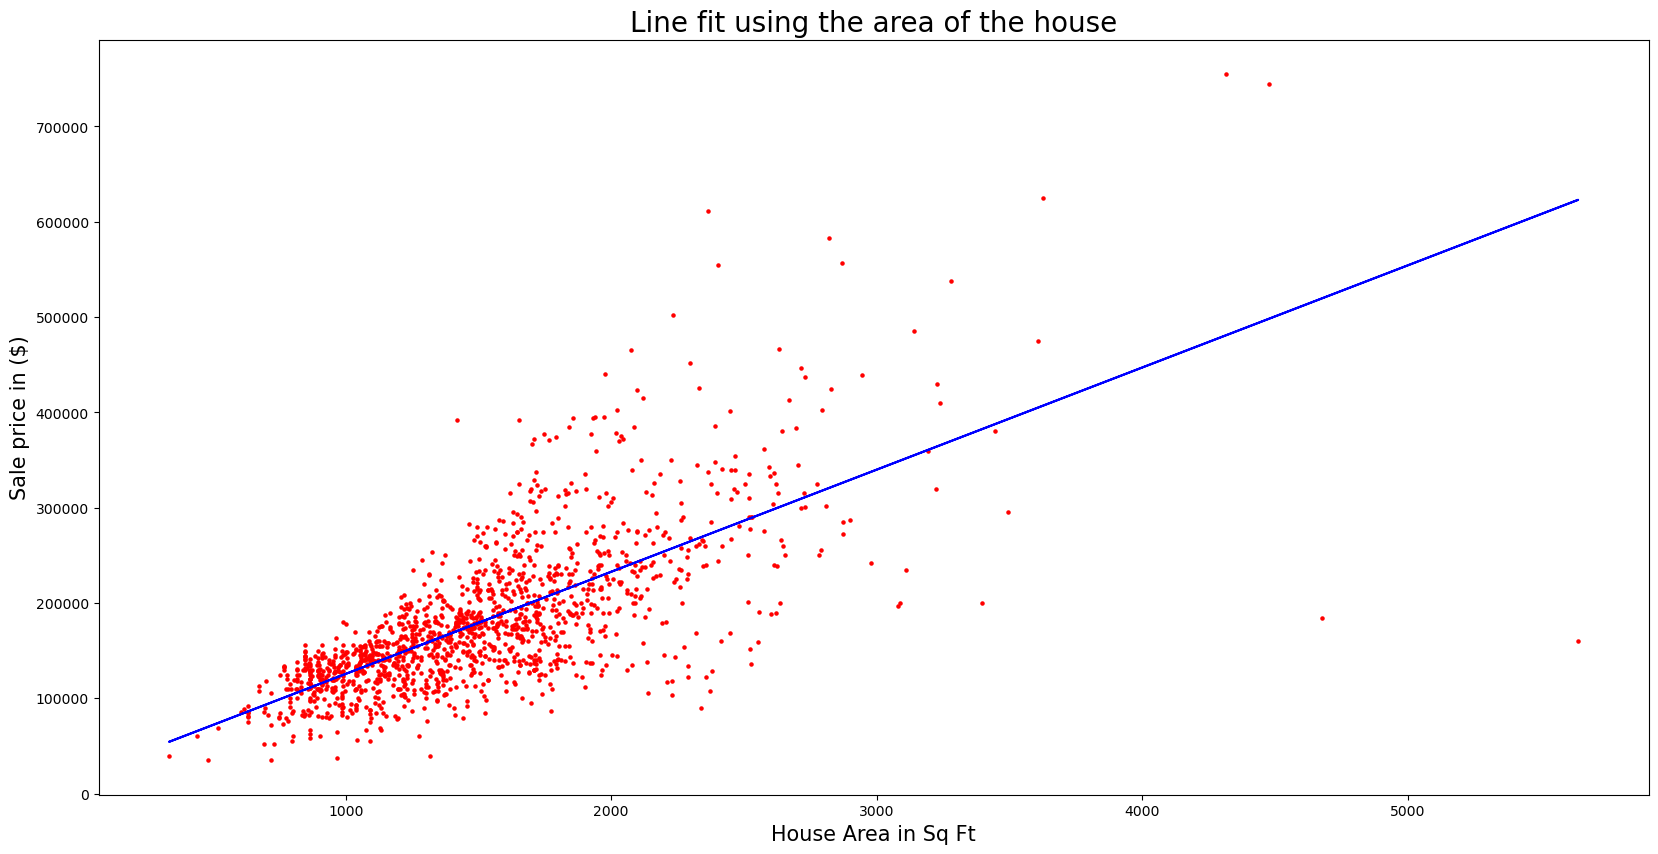

In [31]:
fig, ax = plt.subplots(figsize=(20,10), dpi=100)
ax.scatter(x, y, color='red', s = 5)
ax.plot(x, lr.predict(x), color = 'blue')
ax.set_title("Line fit using the area of the house", fontsize = 20)
ax.set_xlabel("House Area in Sq Ft", fontsize = 15)
ax.set_ylabel("Sale price in ($)", fontsize = 15)

In [36]:
print("The X axis Intercept is: {}\nThe Y axis Intecept is: {}".format(lr.intercept_, lr.coef_[0]))
ols_parameters = [lr.intercept_, lr.coef_[0]]

The X axis Intercept is: 18569.025856487395
The Y axis Intecept is: 107.1303589658251


In [44]:
m = x.shape[0] # Number of training samples
n = x.shape[1] # Number of features

In [48]:
X_with_intercept = np.c_[np.ones(x.shape[0]), x]

In [50]:
np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept)).shape

(2, 2)

In [53]:
sigma = np.linalg.norm(y - lr.predict(x))**2 / (m-n+1)
beta = sigma * np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept))

In [55]:
for i in range(n+1):
    standard_error = beta[i,i] ** 0.5   # standard error for beta_0 and beta_1
    print(f"Standard Error of (beta_hat[{i}]): {standard_error}")
    

    
    t_values = ols_parameters[i]/standard_error
    print(f"t_value of (beta_hat[{i}]): {t_values}")
    
        
    print("━"*60)
    print("━"*60)

Standard Error of (beta_hat[0]): 4477.684487164657
t_value of (beta_hat[0]): 4.147015250787714
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Standard Error of (beta_hat[1]): 2.791706944085611
t_value of (beta_hat[1]): 38.37450030089541
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


In [59]:
m = x.shape[0]
n = x.shape[1]
X_with_intercept = np.c_[np.ones(m), x]
sigma = np.linalg.norm(y - lr.predict(x)) ** 2 / (m-(n+1))
beta = sigma * np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept))


In [61]:
for i in range(n+1):
    standard_error = beta[i,i] ** 0.5   # standard error for beta_0 and beta_1
    print(f"Standard Error of (beta_hat[{i}]): {standard_error}")
    

    
    t_values = ols_parameters[i]/standard_error
    print(f"t_value of (beta_hat[{i}]): {t_values}")
    

    
    p_values = 1 - stats.t.cdf(abs(t_values), df= x.shape[0] -(x.shape[1] + 1))
    print(f"p_value of (beta_hat[{i}]): {p_values}")   
    
    print("━"*60)
    print("━"*60)

Standard Error of (beta_hat[0]): 4480.754548880956
t_value of (beta_hat[0]): 4.144173855969171
p_value of (beta_hat[0]): 1.803277224521338e-05
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Standard Error of (beta_hat[1]): 2.793621038889907
t_value of (beta_hat[1]): 38.34820738907206
p_value of (beta_hat[1]): 0.0
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


In [64]:
X_with_intercept = np.c_[np.ones(x.shape[0]), x]
OLS(y,X_with_intercept).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 23 Dec 2020   Prob (F-statistic):          4.52e-223
Time:                        01:39:32   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
x1           107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""